In [1]:
import math
import os

import numpy as np
import tifffile
import skimage
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as patches

In [2]:
%matplotlib notebook

In [3]:
directory = '../data/faces'
fps = [os.path.join(directory, root) for root in os.listdir(directory)]
fp = np.random.choice(fps)
root = fp.split('/')[-1].split('.')[0]
root

'th (47)'

In [4]:
## https://stackoverflow.com/questions/28260962/calculating-angles-between-line-segments-python-with-math-atan2
def dot(vA, vB):
    return vA[0]*vB[0]+vA[1]*vB[1]

def ang(lineA, lineB):
    # Get nicer vector form
    vA = [(lineA[0][0]-lineA[1][0]), (lineA[0][1]-lineA[1][1])]
    vB = [(lineB[0][0]-lineB[1][0]), (lineB[0][1]-lineB[1][1])]
    # Get dot prod
    dot_prod = dot(vA, vB)
    # Get magnitudes
    magA = dot(vA, vA)**0.5
    magB = dot(vB, vB)**0.5
    # Get cosine value
    cos_ = dot_prod/magA/magB
    # Get angle in radians and then convert to degrees
    angle = math.acos(dot_prod/magB/magA)
    # Basically doing angle <- angle mod 360
    ang_deg = math.degrees(angle)%360
    
    if ang_deg-180>=0:
        # As in if statement
        return 360 - ang_deg
    else: 
        
        return ang_deg

In [5]:
# IS_FIRST = True
PT1 = None
def on_pick(event, mag=25):
    global PT1
    is_first = PT1 is None
    
    x, y = event.xdata, event.ydata
    
    if is_first:
        PT1 = np.asarray([x, y])
        for ax in axd.values():
            for art in ax.lines: art.remove()
            for art in ax.patches: art.remove()
            for art in ax.texts: art.remove()

        axd['A'].imshow(img)
        axd['A'].scatter(x, y, s=2, color='red')
    else:
        axd['A'].scatter(x, y, s=1, color='red')
        pt2 = [event.xdata, event.ydata]
        axd['A'].add_line(mlines.Line2D([PT1[0], pt2[0]], [PT1[1], pt2[1]], color='red'))
        axd['C'].add_line(mlines.Line2D([PT1[0], pt2[0]], [PT1[1], pt2[1]], color='red'))
        
        
        up = np.asarray([0, 1])
        down = np.asarray([0, -1])
        right = np.asarray([1, 0])
        left = np.asarray([-1, 0])
        
        for ax in axd.values():
            rect = patches.Rectangle(
                (min(PT1[0], pt2[0]), min(PT1[1], pt2[1])), abs(PT1[0] - pt2[0]), abs(PT1[1] - pt2[1]),
                linewidth=1, edgecolor='r', facecolor='none')
            axd['A'].add_patch(rect)
            rect = patches.Rectangle(
                (min(PT1[0], pt2[0]), min(PT1[1], pt2[1])), abs(PT1[0] - pt2[0]), abs(PT1[1] - pt2[1]),
                linewidth=1, edgecolor='r', facecolor='none')
            axd['C'].add_patch(rect)
            
            vert = down if PT1[1] > pt2[1] else up
            horz = left if PT1[0] > pt2[0] else right
            
            base = 20
            offset_pt1_vert = np.asarray([base if PT1[0] > pt2[0] else -base, -mag if PT1[1] > pt2[1] else mag])
            offset_pt1_horz = np.asarray([-mag if PT1[0] > pt2[0] else mag, base if PT1[1] > pt2[1] else -base])
            offset_pt2_vert = np.asarray([-base if PT1[0] > pt2[0] else base, mag if PT1[1] > pt2[1] else -mag])
            offset_pt2_horz = np.asarray([mag if PT1[0] > pt2[0] else -mag, -base if PT1[1] > pt2[1] else base])
            
            if PT1[0] > pt2[0] and PT1[1] > pt2[1]:
                pt1_vert_offset = np.asarray([0, mag])
                pt1_horz_offset = np.asarray([mag, 0])
            elif PT1[0] > pt2[0] and PT1[1] <= pt2[1]:
                pt1_vert_offset = np.asarray([0, -mag])
                pt1_horz_offset = np.asarray([mag, 0])
            elif PT1[0] <= pt2[0] and PT1[1] > pt2[1]:
                pt1_vert_offset = np.asarray([0, mag])
                pt1_horz_offset = np.asarray([-mag, 0])
            else:
                pt1_vert_offset = np.asarray([0, -mag])
                pt1_horz_offset = np.asarray([-mag, 0])
    
            coords = PT1 + pt1_horz_offset
            axd['C'].text(coords[0], coords[1], str(int(ang([PT1, pt2], [PT1, PT1 + vert]))))
            coords = PT1 + pt1_vert_offset
            axd['C'].text(coords[0], coords[1], str(int(ang([PT1, pt2], [PT1, PT1 + horz]))))
            
            coords = pt2 - pt1_horz_offset
            axd['C'].text(coords[0], coords[1], str(int(ang([PT1, pt2], [pt2, pt2 + vert]))))
            coords = pt2 - pt1_vert_offset
            axd['C'].text(coords[0], coords[1], str(int(ang([PT1, pt2], [pt2, pt2 + horz]))))
            
        
        
    if not is_first:
        PT1 = None

    for ax in axd.values(): ax.axis('off')
    fig.canvas.draw()

In [6]:
# class Event():
#     def __init__(self, x, y):
#         self.xdata = x
#         self.ydata = y
# e1 = Event(50, 100)
# on_pick(e1)

<IPython.core.display.Javascript object>


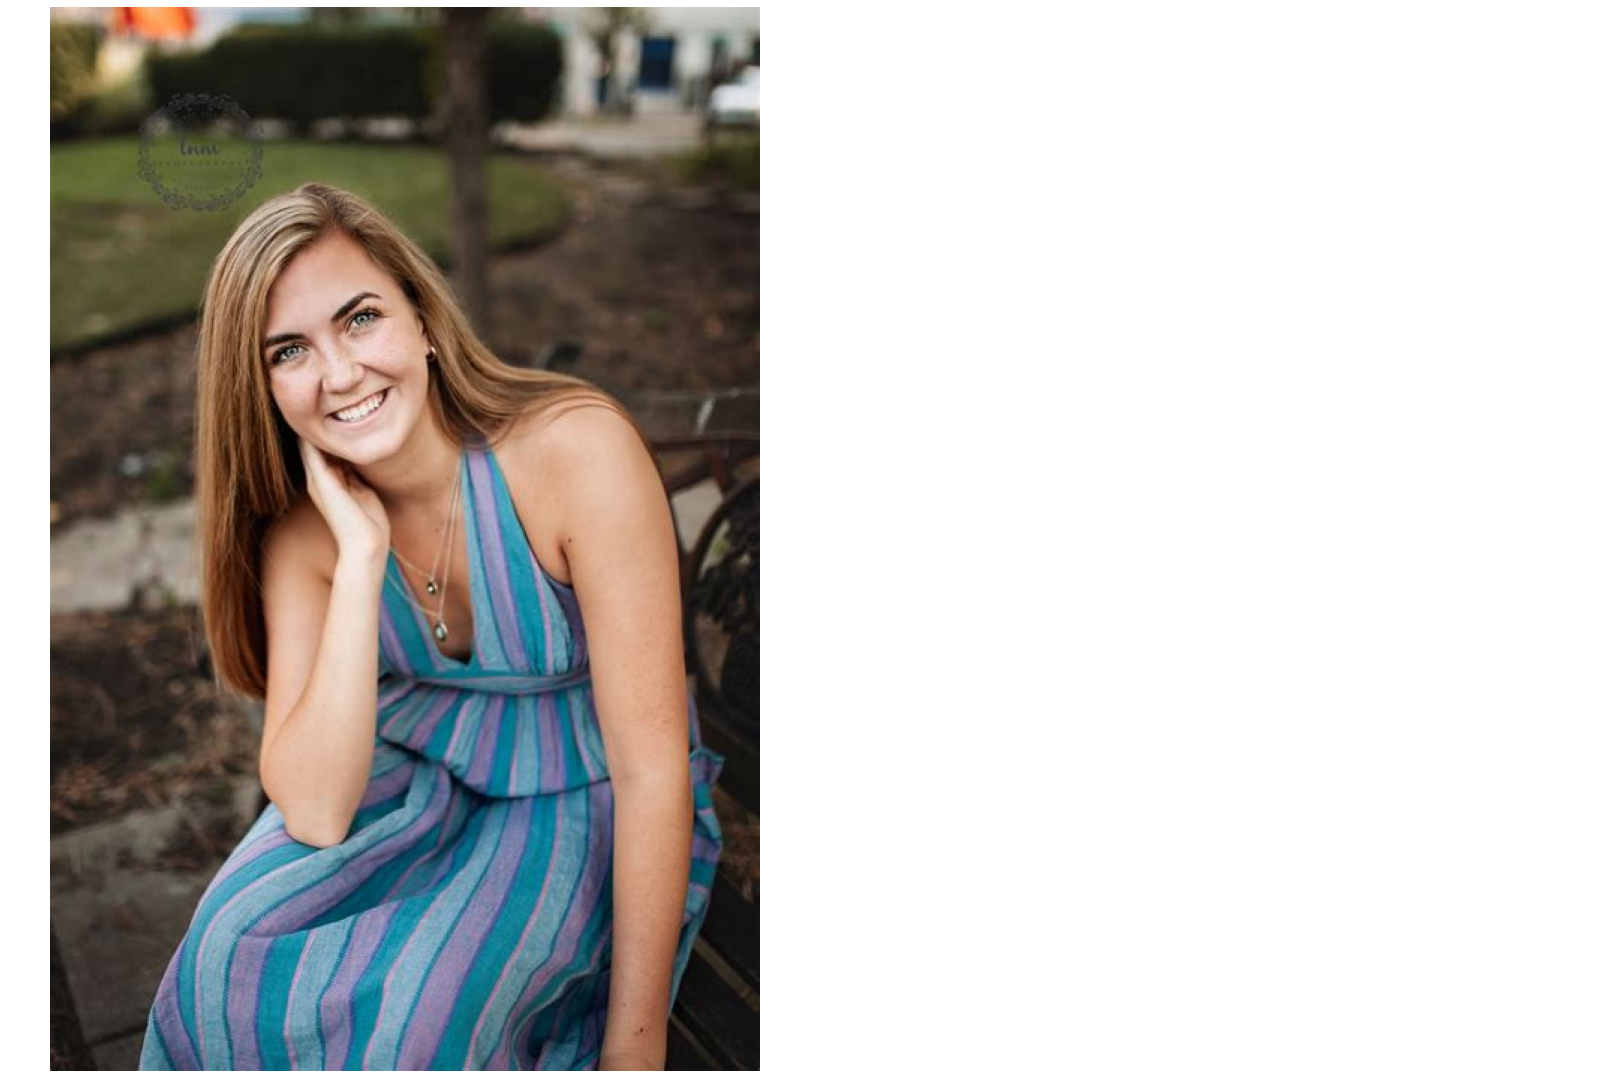

In [7]:
img = skimage.io.imread(fp)
blank = np.full_like(img, 255)
PT1 = None

layout = """
AC
"""
fig = plt.figure(layout="constrained", figsize=(9, 6))
axd = fig.subplot_mosaic(layout)
axd['A'].imshow(img)
axd['C'].imshow(blank)

for ax in axd.values(): ax.axis('off')

fig.canvas.mpl_connect('button_press_event', on_pick)
plt.show()


<IPython.core.display.Javascript object>


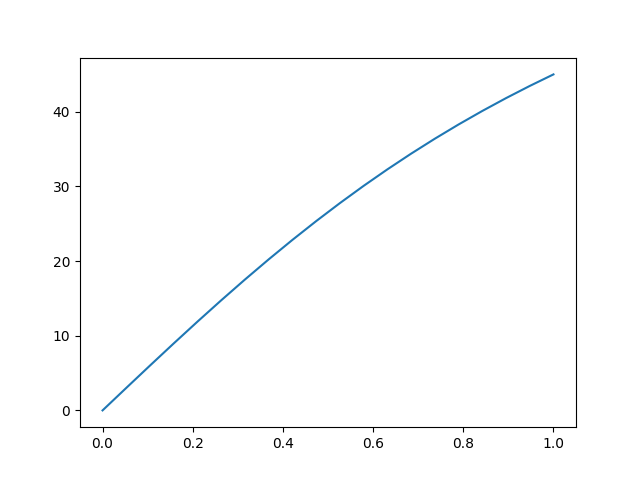

In [49]:
fig, ax = plt.subplots()
xs = np.linspace(0, 1., 20)
# xs = np.asarray([0, .25, .5, .75, 1., 1.5, 2., 4.])

degs = np.degrees(np.arctan(xs))
plt.plot(xs, degs)

In [52]:
np.degrees(np.arctan(np.asarray([0, .1, .2, .25, .33, .5, 1.])))

array([ 0.        ,  5.71059314, 11.30993247, 14.03624347, 18.26288994,
       26.56505118, 45.        ])